In [20]:
import sys
sys.path.append('../')
import numpy
import matplotlib.pyplot as plt
from scripts.data import Dataset, CP_divide
import ROOT
from ROOT import TH1D, TCanvas, gStyle, TLegend, TLorentzVector
from scripts.ang_functions import add_angvar_todata

In [21]:
dataPath = '/home/anna/master_thesis/data/withBDT/'
saveLocation = '/home/anna/master_thesis/files_asymmetry/0601/'
fileType = 'sideband'
data_2016 = Dataset(dataPath, years=[2016], fileType=fileType, L0trigger=True).get_data()
data_2017 = Dataset(dataPath, years=[2017], fileType=fileType, L0trigger=True).get_data()
data_2018 = Dataset(dataPath, years=[2018], fileType=fileType, L0trigger=True).get_data()

In [22]:
add_angvar_todata(data_2016)
add_angvar_todata(data_2017)
add_angvar_todata(data_2018)

In [30]:
data_2016 = data_2016.loc[data_2016['newBDT'] > 0.82].reset_index(drop=True)
data_2017 = data_2017.loc[data_2017['newBDT'] > 0.82].reset_index(drop=True)
data_2018 = data_2018.loc[data_2018['newBDT'] > 0.82].reset_index(drop=True)

In [31]:
observables = {'phi': [[-3., 3.], '#phi'],
               'costhetal': [[-1., 1.], 'cos(#theta_{l})'],
               'costhetak': [[-1., 1.], 'cos(#theta_{k})'],
               'B0_MM': [[5300, 7000], 'M_{B^{0}} [MeV]'],
               'Kstar_MM': [[800, 990], 'M_{K^{*}} [MeV]'],
               # 'mu_P': [[5000, 150000], 'P_{#mu} [MeV/c]'],
               # 'mu_PT': [[0, 10000], 'P_{T#mu} [MeV/c]'],
               # 'mu_TRACK_CHI2NDOF': [[0.3, 2.9], '#mu #chi^{2}/DOF'],
               # 'mu_ETA': [[1.7, 5.1], 'eta_{#mu}']
               }

Info in <TCanvas::Print>: pdf file ../plots/sideband_run2_years_BDTcut.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to pdf file ../plots/sideband_run2_years_BDTcut.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file ../plots/sideband_run2_years_BDTcut.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file ../plots/sideband_run2_years_BDTcut.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file ../plots/sideband_run2_years_BDTcut.pdf and file closed


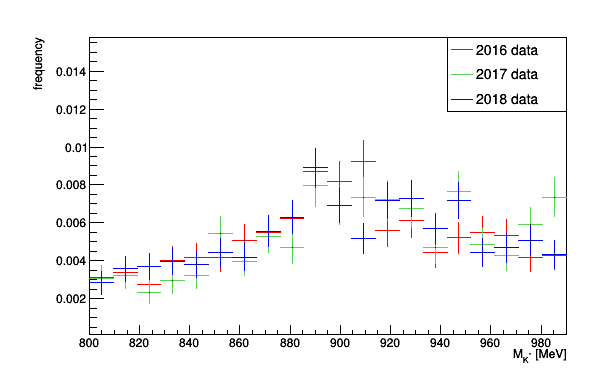

In [34]:
for n, obs in enumerate(observables):
    
    hist_2016 = TH1D('2016_{}'.format(obs), '', 20, observables[obs][0][0], observables[obs][0][1])
    hist_2016.Sumw2()
    hist_2017 = TH1D('2017_{}'.format(obs), '', 20, observables[obs][0][0], observables[obs][0][1])
    hist_2017.Sumw2()
    hist_2018 = TH1D('2018_{}'.format(obs), '', 20, observables[obs][0][0], observables[obs][0][1])
    hist_2018.Sumw2()

    for event in data_2016[obs]:
        hist_2016.Fill(event)
    for event in data_2017[obs]:
        hist_2017.Fill(event)
    for event in data_2018[obs]:
        hist_2018.Fill(event)

    hist_2016.Scale(1. / hist_2016.Integral(), 'width')
    hist_2017.Scale(1. / hist_2017.Integral(), 'width')
    hist_2018.Scale(1. / hist_2018.Integral(), 'width')
    hist_2016.GetYaxis().SetTitle('frequency')
    hist_2016.GetXaxis().SetTitle(observables[obs][1])
    low_lim = 0.0001
    if obs=='B0_MM':
        up_lim = 1./(observables[obs][0][1] - observables[obs][0][0]) * 3.5
    else:
        up_lim = 1./(observables[obs][0][1] - observables[obs][0][0]) * 3
    hist_2016.GetYaxis().SetRangeUser(low_lim, up_lim)
    hist_2016.SetStats(0)
    hist_2016.SetLineColor(2)
    hist_2017.SetLineColor(8)
    hist_2018.SetLineColor(4)
    # Draw histograms and legend
    drawCanv = TCanvas('obs_{}'.format(obs), '{}'.format(obs), 600, 400)
    hist_2016.Draw('E')
    hist_2017.Draw('E same')
    hist_2018.Draw('E same')
    leg = TLegend(.75, .7, 0.95, .9, '')
    leg.SetFillColor(0)
    leg.SetTextSize(0.04)
    leg.AddEntry(hist_2016, '2016 data', 'L')
    leg.AddEntry(hist_2017, '2017 data', 'L')
    leg.AddEntry(hist_2018, '2018 data', 'L')
    leg.DrawClone('same')
    drawCanv.SetMargin(0.15, 0.05, 0.1, 0.1)
    drawCanv.Draw()
    if n==0:
        drawCanv.Print('../plots/sideband_run2_years_BDTcut.pdf(')
    else:
        if n == len(observables)-1:
            drawCanv.Print('../plots/sideband_run2_years_BDTcut.pdf)')
        else:
            drawCanv.Print('../plots/sideband_run2_years_BDTcut.pdf')